<a href="https://colab.research.google.com/github/luendres/arquivo.pt_AI/blob/main/Evolu%C3%A7%C3%A3o_do_Discurso_P%C3%BAblico_sobre_Intelig%C3%AAncia_Artificial_na_Web_Portuguesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1ª Parte: Obter dados relevantes do Arquivo.pt e adicioná-los a um ficheiro CSV "resultados_arquivo_pt.csv":

In [1]:
import requests
import csv
import time

# 🔍 TERMOS DE BUSCA
search_terms = ["inteligência artificial", "machine learning", "aprendizado automático", "robôs inteligentes", "IA"]

# 📅 INTERVALOS DE ANOS (em blocos de 5 anos)
year_ranges = [
    (19960101, 20001231),
    (20010101, 20051231),
    (20060101, 20101231),
    (20110101, 20151231),
    (20160101, 20201231),
    (20210101, 20250401)
]

# Número máximo de resultados por requisição
max_items = 50

# 📁 Arquivo CSV de saída
with open("resultados_arquivo_pt.csv", mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Termo', 'Período', 'Título', 'Link Arquivo.pt', 'Data', 'Texto Extraído']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    # 🔁 Loop sobre cada termo e cada intervalo de tempo
    for term in search_terms:
        for from_year, to_year in year_ranges:
            print(f"🔎 Buscando: {term} ({from_year} a {to_year})")

            payload = {
                'q': term,
                'maxItems': max_items,
                'from': from_year,
                'to': to_year
            }
            r = requests.get('http://arquivo.pt/textsearch', params=payload)
            if r.status_code != 200:
                print(f"Erro na requisição para {term} de {from_year} a {to_year}")
                continue

            json_data = r.json()

            # Verifica se há resultados
            if "response_items" not in json_data:
                print(f"⚠️ Nenhum resultado encontrado.")
                continue

            for item in json_data["response_items"]:
                try:
                    title = item.get("title", "")
                    link = item.get("linkToArchive", "")
                    date = item.get("tstamp", "")
                    text_url = item.get("linkToExtractedText", "")

                    # Tenta baixar o texto extraído da página
                    extracted_text = ""
                    if text_url:
                        text_response = requests.get(text_url)
                        if text_response.status_code == 200:
                            extracted_text = text_response.content.decode("utf-8")

                    writer.writerow({
                        'Termo': term,
                        'Período': f"{from_year}-{to_year}",
                        'Título': title,
                        'Link Arquivo.pt': link,
                        'Data': date,
                        'Texto Extraído': extracted_text[:1000]  # salva só os 1000 primeiros caracteres
                    })

                    # Dorme um pouco entre as chamadas para não sobrecarregar o servidor
                    time.sleep(1)

                except Exception as e:
                    print(f"Erro ao processar item: {e}")


🔎 Buscando: inteligência artificial (19960101 a 20001231)
🔎 Buscando: inteligência artificial (20010101 a 20051231)
🔎 Buscando: inteligência artificial (20060101 a 20101231)
🔎 Buscando: inteligência artificial (20110101 a 20151231)
🔎 Buscando: inteligência artificial (20160101 a 20201231)
🔎 Buscando: inteligência artificial (20210101 a 20250401)
🔎 Buscando: machine learning (19960101 a 20001231)
🔎 Buscando: machine learning (20010101 a 20051231)
🔎 Buscando: machine learning (20060101 a 20101231)
🔎 Buscando: machine learning (20110101 a 20151231)
🔎 Buscando: machine learning (20160101 a 20201231)
🔎 Buscando: machine learning (20210101 a 20250401)
🔎 Buscando: aprendizado automático (19960101 a 20001231)
🔎 Buscando: aprendizado automático (20010101 a 20051231)
Erro ao processar item: HTTPSConnectionPool(host='arquivo.pt', port=443): Max retries exceeded with url: /textextracted?m=http%3A%2F%2Fwww.supervestibular.com%2Fartigos%2Fimprimir.asp%3FID%3D91%2F20050621155338 (Caused by ConnectTim

2ª Parte: Importar ficheiro para o Colab para análise posterior:

In [5]:
from google.colab import files
uploaded = files.upload()


Saving resultados_arquivo_pt.csv to resultados_arquivo_pt.csv


3ª Parte: Exibir as primeiras linhas do ficheiro CSV para confirmar que está com os headers ok:

In [6]:
import pandas as pd

# Carregue o CSV no pandas
df = pd.read_csv('resultados_arquivo_pt.csv')

# Exibe as primeiras linhas do CSV
df.head()



,Termo,Período,Título,Link Arquivo.pt,Data,Texto Extraído
0,inteligência artificial,19960101-20001231,Apresentação,https://arquivo.pt/wayback/19961013202736/http...,19961013202736,Apresentação Apresentação Julho 94 O Departame...
1,inteligência artificial,19960101-20001231,SAPO / Institutos e Laboratórios de Investigação,https://arquivo.pt/wayback/19961013150252/http...,19961013150252,SAPO / Institutos e Laboratórios de Investigaç...
2,inteligência artificial,19960101-20001231,Grupos de investigacao do DIFCUL,https://arquivo.pt/wayback/19961013180312/http...,19961013180312,Grupos de investigacao do DIFCUL Grupos de Inv...
3,inteligência artificial,19960101-20001231,MATÉRIA PENSANTE (Colecção Ciência Aberta),https://arquivo.pt/wayback/19961124130836/http...,19961124130836,MATÉRIA PENSANTE (Colecção Ciência Aberta) Gra...
4,inteligência artificial,19960101-20001231,CIÊNCIA & TECNOLOGIA,https://arquivo.pt/wayback/20000521120836/http...,20000521120836,CIÊNCIA & TECNOLOGIA CIÊNCIA & TECNOLOGIA Con...


4ª Parte: Ler o arquivo CSV e converter os valores das datas para melhor usabilidade posterior:

In [7]:
# Primeiro, carregue o CSV
df = pd.read_csv('resultados_arquivo_pt.csv')

# Converta a coluna 'Data' (com valores no formato 'YYYYMMDDHHMMSS') para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d%H%M%S', errors='coerce')

# Verifique se a conversão foi bem-sucedida
print(df['Data'].head())

# Agora, extraímos o ano
df['ano'] = df['Data'].dt.year

# Verificar as primeiras linhas da coluna 'ano'
print(df['ano'].head())



0   1996-10-13 20:27:36
1   1996-10-13 15:02:52
2   1996-10-13 18:03:12
3   1996-11-24 13:08:36
4   2000-05-21 12:08:36
Name: Data, dtype: datetime64[ns]
0    1996
1    1996
2    1996
3    1996
4    2000
Name: ano, dtype: int32


5ª Parte: Função para garantir que só textos válidos (strings) sejam processados:

In [ ]:
def clean_text(text):
    if isinstance(text, str):  # Verifique se o valor é uma string
        text = text.lower()  # Convertendo para minúsculas
        text = re.sub(r'\W+', ' ', text)  # Remover caracteres especiais
        tokens = word_tokenize(text)  # Tokenizar
        tokens = [t for t in tokens if t not in stopwords.words('portuguese')]  # Remover stopwords
        return ' '.join(tokens)
    else:
        return ''  # Retorna uma string vazia se o valor não for uma string válida

df['clean_text'] = df['Texto Extraído'].apply(clean_text)  # Aplique a função


6ª Parte: Carregar os dados para ser analisado por um modelo NLP de classificação de sentimentos que funciona bem para línguas como o português:

In [ ]:
from transformers import pipeline

# Carregar o pipeline de análise de sentimento com um modelo para tal
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Aplicando o modelo nos textos
df['sentimento'] = df['clean_text'].apply(lambda x: classifier(x[:512])[0]['label'])  # Limitar o texto a 512 tokens


7ª Parte: Preparação final dos dados, transformando datas, mapeando sentimentos e gerando um gráfico da evolução do sentimento ao longo dos anos:

In [ ]:
# Verificar se a coluna 'Data' tem valores nulos ou mal formatados
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Verificar se há valores nulos após a conversão
print(df['Data'].isnull().sum())  # Verifica quantos valores nulos há

# Se houver valores nulos, podemos preencher ou remover esses registros
df = df.dropna(subset=['Data'])  # Remover registros com data inválida

# Adicionar a coluna 'ano'
df['ano'] = df['Data'].dt.year

# Ajustar os sentimentos: se for uma escala de estrelas (1-5), podemos mapear para positivo ou negativo
sentimento_map = {
    '1 star': 'negativo',
    '2 stars': 'negativo',
    '3 stars': 'neutro',
    '4 stars': 'positivo',
    '5 stars': 'positivo'
}

df['sentimento'] = df['sentimento'].map(sentimento_map)

# Contagem do sentimento por ano
sentimento_por_ano = df.groupby('ano')['sentimento'].value_counts(normalize=True).unstack().fillna(0)

# Plotar gráfico de barras empilhadas
import matplotlib.pyplot as plt

sentimento_por_ano.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Evolução do sentimento sobre IA ao longo dos anos")
plt.ylabel("Proporção")
plt.xlabel("Ano")
plt.tight_layout()
plt.show()



8ª Parte: Gerar uma nuvem de palavras (word cloud) a partir da coluna clean_text, que contém o texto processado (sem pontuação, minúsculas, sem stopwords etc.), para visualizar os termos mais frequentes relacionados à inteligência artificial no conteúdo do Arquivo.pt em intervalos de 5 anos:

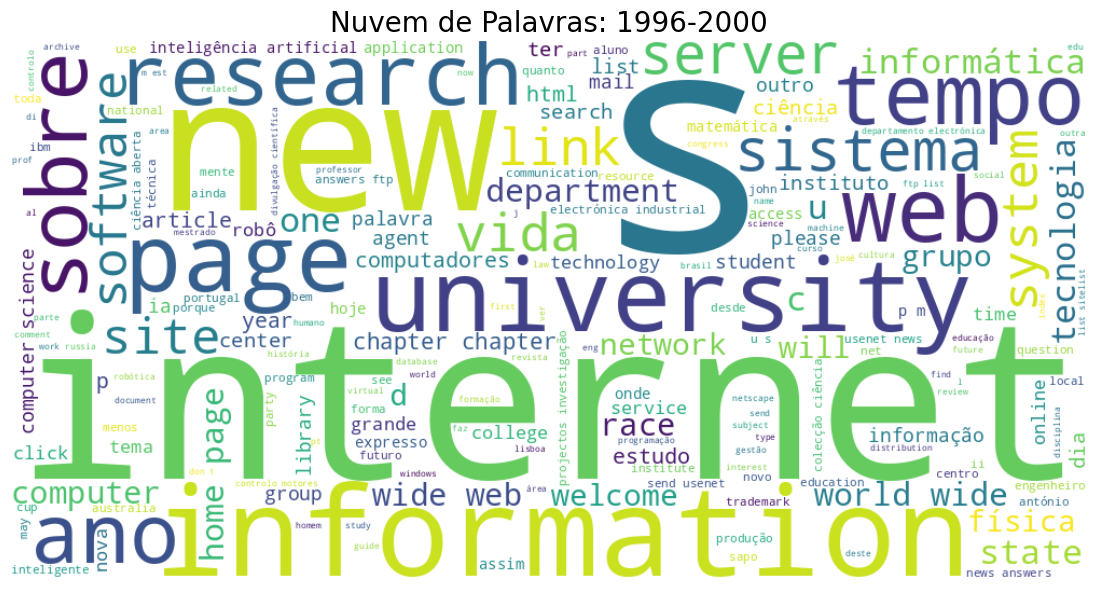

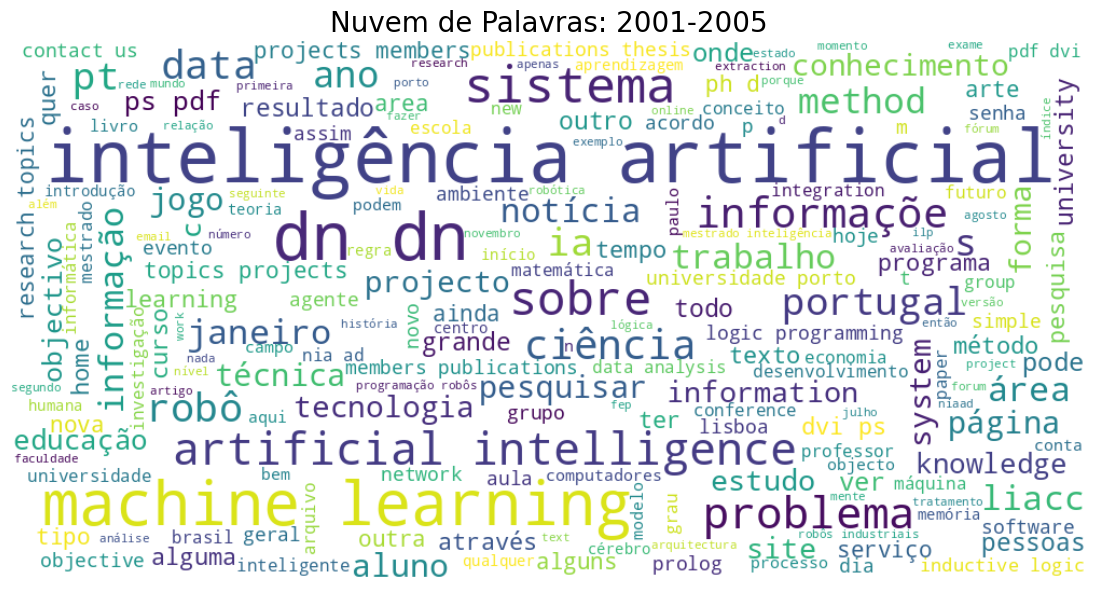

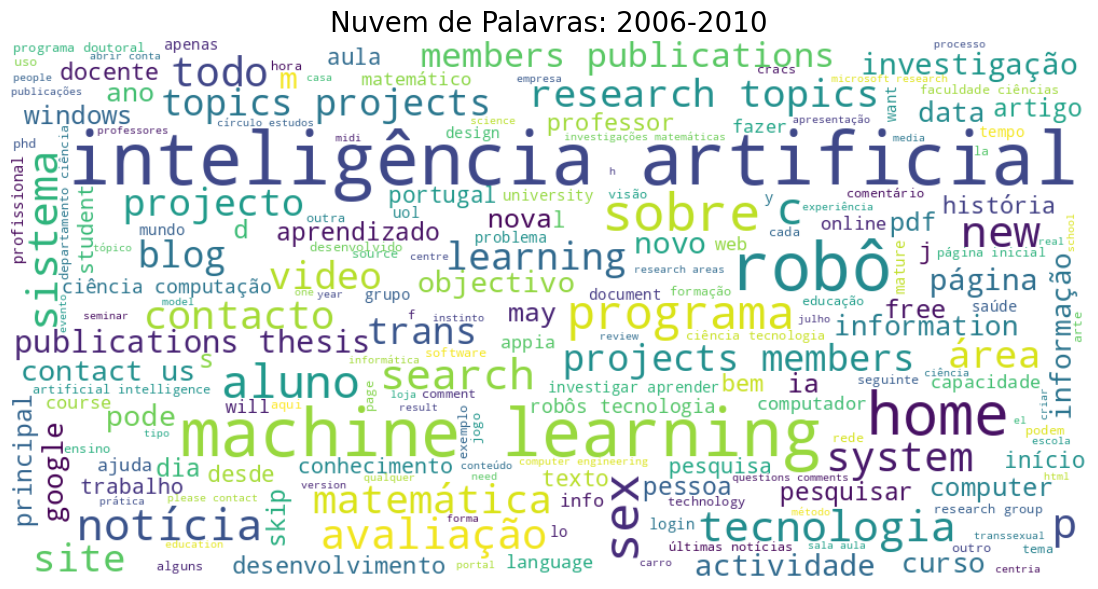

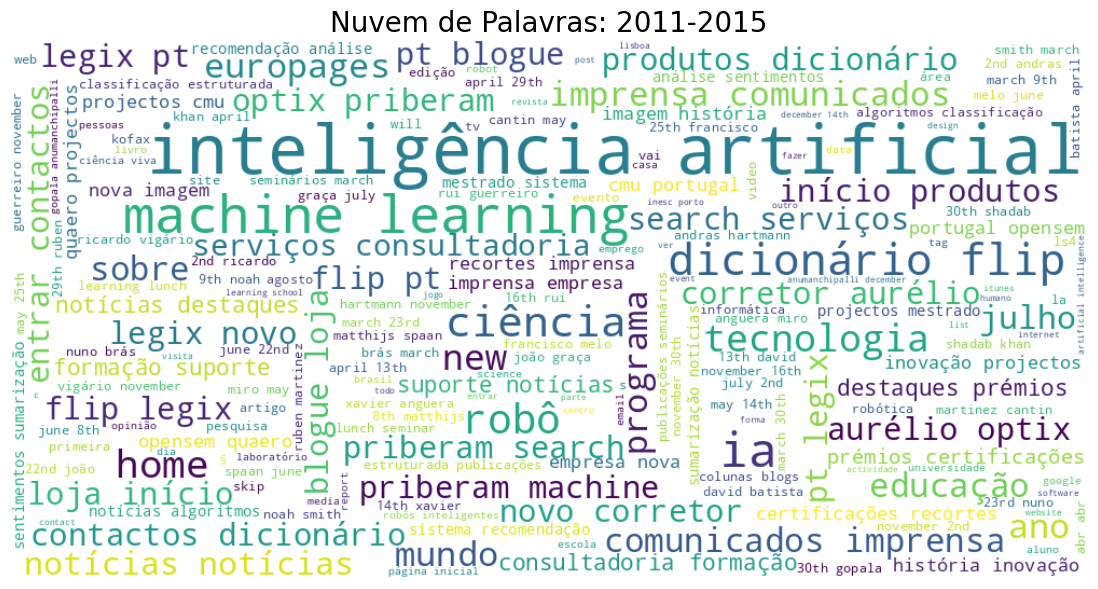

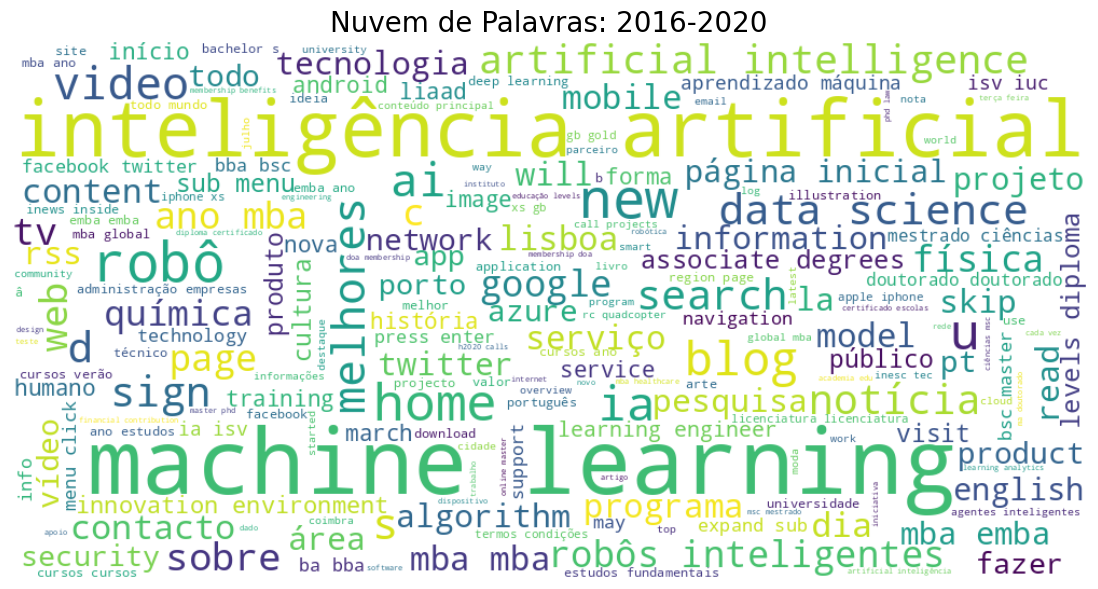

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Certifique-se de que a coluna 'ano' está correta
df['ano'] = pd.to_datetime(df['Data']).dt.year

# Criar intervalos de 5 anos
intervalos = range(1996, 2026, 5)

# Gerar a nuvem de palavras por cada intervalo de 5 anos
for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fim = intervalos[i + 1] - 1  # O fim é o ano anterior ao próximo intervalo

    # Filtrar os dados para o intervalo de tempo
    filtro = df[(df['ano'] >= inicio) & (df['ano'] <= fim)]

    # Juntar todos os textos do intervalo
    texto_completo = ' '.join(filtro['clean_text'].dropna())

    # Criar a WordCloud
    wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis', max_words=200).generate(texto_completo)

    # Mostrar a WordCloud
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvem de Palavras: {inicio}-{fim}", fontsize=20)
    plt.show()


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True